In [63]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [64]:
#Reading in our data
data = pd.read_csv("/content/Time_series_analysis_and_forecast_DATASET.csv")
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,01-09-10 0:00,15.8,1688.215,3.69,23.710
1,01-09-10 1:00,15.8,1669.195,3.69,22.635
2,01-09-10 2:00,15.8,1491.980,3.69,22.565
3,01-09-10 3:00,15.8,1330.760,3.69,18.910
4,01-09-10 4:00,15.8,1247.940,3.69,18.030


Using the daily sampling rate (sum), divide the data into a train and test set. The first 2757 days is your train set and the last (x-2757) days is your test set. Where x is the length of the dataset. Use Facebook Prophet to train a Univariate time series model using the FullDate column as (‘dt’ or ‘ds’) and ElecPrice as ( ‘y’).

Since I am unable to install fbprophet, We are going to use StatsModel.

In [65]:
data.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [66]:
#Convert 'Month' column to datetime
data["FullDate"] = pd.to_datetime(data["FullDate"])

In [67]:
data.head(5)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-01-09 00:00:00,15.8,1688.215,3.69,23.710
1,2010-01-09 01:00:00,15.8,1669.195,3.69,22.635
2,2010-01-09 02:00:00,15.8,1491.980,3.69,22.565
3,2010-01-09 03:00:00,15.8,1330.760,3.69,18.910
4,2010-01-09 04:00:00,15.8,1247.940,3.69,18.030


In [68]:
import statsmodels.api as sm

In [69]:
# Divide data into train and test sets
train_length = 2757
train = data.iloc[:train_length]
test = data.iloc[train_length:]

In [70]:
# Create the time series model
model = sm.tsa.ARIMA(train['ElecPrice'], order=(1, 0, 1))

# Fit the model to the data
results = model.fit()

# Forecast using the fitted model
forecast = results.forecast(steps=len(test))

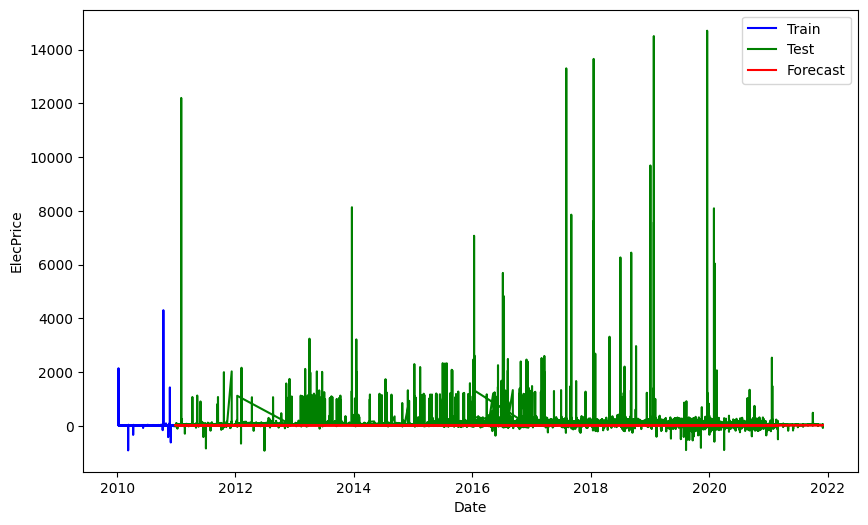

In [71]:
# Create a new DataFrame for the forecast results
forecast_df = pd.DataFrame({
    'FullDate': test['FullDate'],
    'ElecPrice': forecast
})

# Plot the forecast and actual values
plt.figure(figsize=(10, 6))
plt.plot(train['FullDate'], train['ElecPrice'], label='Train', color='blue')
plt.plot(test['FullDate'], test['ElecPrice'], label='Test', color='green')
plt.plot(forecast_df['FullDate'], forecast_df['ElecPrice'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.legend()
plt.show()

In the last exercise, we used only the dependent variable (ElecPrice) and the time component for our modeling (ds vs y). Next, we will build a time series model using the other variables. These variables will be added to the forecast model as a regressor on Facebook Prophet. So the 3 independent variables [‘SysLoad’,’Tmax’,’GasPrice’'] will be [‘add1’, ‘add2’, ‘add3’’] as the regressors. Split the data into train and test as done above and build a multivariate forecast model to forecast the last x-2757 days of ElecPrice.

We used StatsModel since we were unable to install fbprophet.

In [72]:
# Split the data into train and test sets
train = data[:2757]
test = data[2757:]

In [73]:
# Create the multivariate forecast model with 'SysLoad', 'Tmax', and 'GasPrice' as regressors
X_train = sm.add_constant(train[['SysLoad', 'Tmax', 'GasPrice']])
y_train = train['ElecPrice']
model = sm.OLS(y_train, X_train).fit()

In [74]:
# Forecast the last x-2757 days of ElecPrice using the test set regressors
X_test = sm.add_constant(test[['SysLoad', 'Tmax', 'GasPrice']])
forecast = model.predict(X_test)

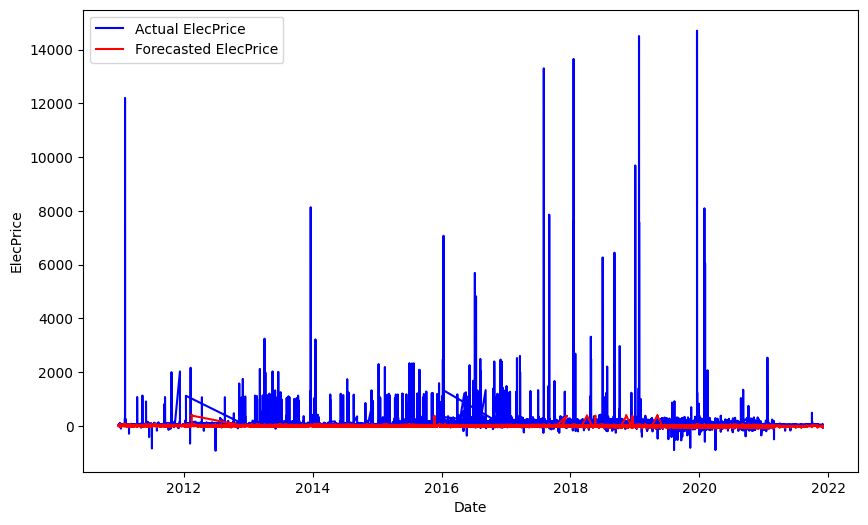

In [76]:
# Create a new DataFrame for the forecast results
forecast_df1 = pd.DataFrame({
    'FullDate': test['FullDate'],
    'Actual_ElecPrice': test['ElecPrice'],
    'Forecasted_ElecPrice': forecast
})

# Plot the forecasted and actual values
plt.figure(figsize=(10, 6))
plt.plot(test['FullDate'], test['ElecPrice'], label='Actual ElecPrice', color='blue')
plt.plot(test['FullDate'], forecast, label='Forecasted ElecPrice', color='red')
plt.xlabel('Date')
plt.ylabel('ElecPrice')
plt.legend()
plt.show()